## ARCH Model Selection

### Exercise 76

Which model is selected for the S&P 500 among the classes:
a. TARCH
b. GJR-GARCH
c. EGARCH

In [1]:
import pandas as pd

sp500 = pd.read_hdf("./data/arch-data.h5", "sp500")
sp500_returns = 1000 * sp500.pct_change().dropna()
sp500_returns.head()

,SP500
DATE,
2010-01-12,-9.381157
2010-01-13,8.325852
2010-01-14,2.426507
2010-01-15,-10.823189
2010-01-19,12.499670


#### Explanation

Start with a baseline GARCH(1,1,1) 

In [2]:
from arch import arch_model

garch = arch_model(sp500_returns)
garch_res = garch.fit(disp="off")
garch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8776.55
Distribution:                  Normal   AIC:                           17561.1
Method:            Maximum Likelihood   BIC:                           17584.4
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:25   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.8168      0.140      5.845  5.068e-09 [  0.543,  1.091]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.6050      0.810      4.452  8.515e-06 [  2.018,  5.192]
alpha[1]       0.1688  2.471e-02      6.830  8.474e-12 [  0.120,  0.217]
beta[1]        0.7923  2.409e-02     32.887 3.318e-237 [  0.745,  0.839]
========================================================================

Covariance estimator: robust
"""

#### Explanation

We can then extend this model with an asymmetry into a GJR-GARCH(1,1,1). 
The asymmetry term is highly significant and eliminates the symmetric term.

In [3]:
gjr_111 = arch_model(sp500_returns, o=1)
gjr_111_res = gjr_111.fit(disp="off")
gjr_111_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -8709.19
Distribution:                  Normal   AIC:                           17428.4
Method:            Maximum Likelihood   BIC:                           17457.5
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:25   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4165      0.135      3.078  2.087e-03 [  0.151,  0.682]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.4881      0.587      5.942  2.810e-09      [  2.338,  4.639]
alpha[1]   3.5753e-11  3.042e-02  1.175e-09      1.000 [-5.963e-02,5.963e-02]
gamma[1]       0.2799  4.204e-02      6.658  2.767e-11      [  0.198,  0.362]
beta[1]        0.8176  2.372e-02     34.469 2.362e-260      [  0.771,  0.864]
=============================================================================

Covariance estimator: robust
"""

#### Explanation

We can then expand these to see if more lags are needed.  The
(1,1,1) specification appears to be adequate.
 

In [4]:
gjr_121 = arch_model(sp500_returns, o=2)
gjr_121_res = gjr_121.fit(disp="off")
gjr_121_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -8708.35
Distribution:                  Normal   AIC:                           17428.7
Method:            Maximum Likelihood   BIC:                           17463.7
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:26   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4142      0.135      3.061  2.204e-03 [  0.149,  0.679]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.6821      0.665      5.541  3.014e-08      [  2.380,  4.985]
alpha[1]   4.1088e-10  3.200e-02  1.284e-08      1.000 [-6.272e-02,6.272e-02]
gamma[1]       0.2277  6.988e-02      3.258  1.122e-03    [9.071e-02,  0.365]
gamma[2]       0.0639  6.235e-02      1.025      0.305   [-5.830e-02,  0.186]
beta[1]        0.8091  2.793e-02     28.967 1.730e-184      [  0.754,  0.864]
=============================================================================

Covariance estimator: robust
"""

In [5]:
gjr_112 = arch_model(sp500_returns, o=1, q=2)
gjr_112_res = gjr_112.fit(disp="off")
gjr_112_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -8709.19
Distribution:                  Normal   AIC:                           17430.4
Method:            Maximum Likelihood   BIC:                           17465.4
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:26   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4166      0.136      3.066  2.172e-03 [  0.150,  0.683]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.4881      0.750      4.648  3.346e-06      [  2.017,  4.959]
alpha[1]   2.4066e-10  3.184e-02  7.559e-09      1.000 [-6.240e-02,6.240e-02]
gamma[1]       0.2799  5.322e-02      5.260  1.442e-07      [  0.176,  0.384]
beta[1]        0.8176      0.204      4.009  6.098e-05      [  0.418,  1.217]
beta[2]        0.0000      0.168      0.000      1.000      [ -0.329,  0.329]
=============================================================================

Covariance estimator: robust
"""

#### Explanation

Next, we can examine how a TARCH performs relative to a GJR.  It produces
a higher likelihood and so is preferred.

In [6]:
tarch_111 = arch_model(sp500_returns, o=1, power=1.0)
tarch_111_res = tarch_111.fit(disp="off")
tarch_111_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -8682.93
Distribution:                  Normal   AIC:                           17375.9
Method:            Maximum Likelihood   BIC:                           17405.0
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3354      0.130      2.573  1.009e-02 [7.988e-02,  0.591]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4339  6.619e-02      6.555  5.563e-11      [  0.304,  0.564]
alpha[1]       0.0000  1.980e-02      0.000      1.000 [-3.881e-02,3.881e-02]
gamma[1]       0.2384  2.665e-02      8.945  3.716e-19      [  0.186,  0.291]
beta[1]        0.8597  1.574e-02     54.609      0.000      [  0.829,  0.891]
=============================================================================

Covariance estimator: robust
"""

#### Explanation

We can also examine additional lags in the TARCH. These are
both insignificant. 

In [7]:
tarch_121 = arch_model(sp500_returns, o=2, power=1.0)
tarch_121_res = tarch_121.fit(disp="off")
tarch_121_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -8682.52
Distribution:                  Normal   AIC:                           17377.0
Method:            Maximum Likelihood   BIC:                           17412.0
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3338      0.131      2.551  1.073e-02 [7.738e-02,  0.590]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4511  7.327e-02      6.157  7.424e-10      [  0.307,  0.595]
alpha[1]       0.0000  2.023e-02      0.000      1.000 [-3.966e-02,3.966e-02]
gamma[1]       0.2157  4.161e-02      5.185  2.165e-07      [  0.134,  0.297]
gamma[2]       0.0293  3.878e-02      0.755      0.450   [-4.674e-02,  0.105]
beta[1]        0.8551  1.773e-02     48.224      0.000      [  0.820,  0.890]
=============================================================================

Covariance estimator: robust
"""

In [8]:
tarch_112 = arch_model(sp500_returns, o=1, q=2, power=1.0)
tarch_112_res = tarch_112.fit(disp="off")
tarch_112_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -8682.93
Distribution:                  Normal   AIC:                           17377.9
Method:            Maximum Likelihood   BIC:                           17412.8
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3354      0.131      2.564  1.034e-02 [7.903e-02,  0.592]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4339  7.312e-02      5.934  2.953e-09      [  0.291,  0.577]
alpha[1]       0.0000  1.994e-02      0.000      1.000 [-3.908e-02,3.908e-02]
gamma[1]       0.2384  3.353e-02      7.109  1.165e-12      [  0.173,  0.304]
beta[1]        0.8597      0.130      6.603  4.016e-11      [  0.605,  1.115]
beta[2]        0.0000      0.115      0.000      1.000      [ -0.225,  0.225]
=============================================================================

Covariance estimator: robust
"""

#### Explanation

Finally, we can look at an EGARCH model. This model cannot be
easily constructed using the ``arch_model``. Instead, we need
to build it from the mean component ``ConstantMean`` and the 
volatility process ``EGARCH``. 

This model produces a lower log-likelihood than the TARCH model
and so we finally select the TARCH.

In [9]:
from arch.univariate import EGARCH, ConstantMean

egarch_111 = EGARCH(p=1, o=1, q=1)
mod = ConstantMean(sp500_returns, volatility=egarch_111)
egarch_111_res = mod.fit(disp="off")
egarch_111_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -8690.33
Distribution:                  Normal   AIC:                           17390.7
Method:            Maximum Likelihood   BIC:                           17419.8
                                        No. Observations:                 2510
Date:                Wed, Aug 27 2025   Df Residuals:                     2509
Time:                        15:13:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3333      0.132      2.521  1.172e-02 [7.413e-02,  0.593]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2377  3.847e-02      6.179  6.471e-10 [  0.162,  0.313]
alpha[1]       0.1691  2.227e-02      7.593  3.120e-14 [  0.125,  0.213]
gamma[1]      -0.2210  2.374e-02     -9.310  1.278e-20 [ -0.268, -0.174]
beta[1]        0.9438  8.775e-03    107.551      0.000 [  0.927,  0.961]
========================================================================

Covariance estimator: robust
"""

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

<Axes: xlabel='DATE'>

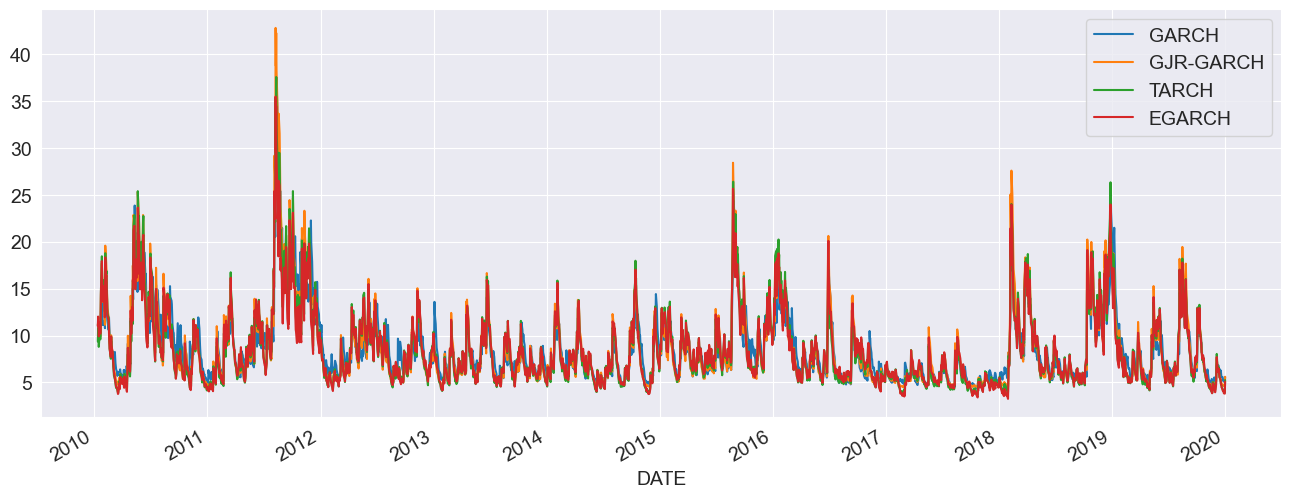

In [11]:
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

vol = pd.concat(
    [
        garch_res.conditional_volatility,
        gjr_111_res.conditional_volatility,
        tarch_111_res.conditional_volatility,
        egarch_111_res.conditional_volatility,
    ],
    axis=1,
)
vol.columns = ["GARCH", "GJR-GARCH", "TARCH", "EGARCH"]
vol.plot()

#### Explanation

Finally, we can plot the fit volatilities from some of the models. The fits
are very similar although there are short periods (e.g., near 2018) where
they differ.